In [75]:
import pandas as pd

# Load PBJ staffing data and CMS Quality Measures data
pbj_data = pd.read_csv('pbj.csv',low_memory=False)  # Replace with actual file path


In [74]:
# Select relevant columns from PBJ data and create a copy
pbj_data_clean = pbj_data[['PROVNUM', 'Hrs_RN', 'Hrs_CNA', 'MDScensus']].copy()

# Rename the columns (create new DataFrames instead of modifying in place)
pbj_data_clean = pbj_data_clean.rename(columns={'PROVNUM': 'Provider_Number'})



In [33]:
# Load CMS data and specify column types to avoid dtype warning
cms_quarterly_data = pd.read_csv(
    'NH_QualityMsr_MDS_Aug2024 (1).csv', 
    dtype={'CMS Certification Number (CCN)': str},  # Example: set CCN to string
    low_memory=False
)

# Display the first few rows to ensure it's loaded correctly
# cms_quarterly_data.head()



,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Measure Code,Measure Description,Resident type,Q1 Measure Score,...,Q3 Measure Score,Footnote for Q3 Measure Score,Q4 Measure Score,Footnote for Q4 Measure Score,Four Quarter Average Score,Footnote for Four Quarter Average Score,Used in Quality Measure Five Star Rating,Measure Period,Location,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,401,Percentage of long-stay residents whose need f...,Long Stay,4.347830,...,11.363636,NaN,6.976744,NaN,7.303372,NaN,Y,2022Q4-2023Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2024-08-01
1,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,404,Percentage of long-stay residents who lose too...,Long Stay,2.439024,...,0.000000,NaN,5.000000,NaN,2.409639,NaN,N,2023Q2-2024Q1,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2024-08-01
2,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,405,Percentage of low risk long-stay residents who...,Long Stay,NaN,...,NaN,9.0,NaN,9.0,56.451613,NaN,N,2022Q4-2023Q3,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2024-08-01
3,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,406,Percentage of long-stay residents with a cathe...,Long Stay,1.078271,...,3.924880,NaN,3.584012,NaN,2.798397,NaN,Y,2023Q2-2024Q1,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2024-08-01
4,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,407,Percentage of long-stay residents with a urina...,Long Stay,0.000000,...,0.000000,NaN,0.000000,NaN,0.000000,NaN,Y,2023Q2-2024Q1,"701 MONROE STREET NW, RUSSELLVILLE, AL, 35653",2024-08-01


In [37]:
# Select relevant columns from PBJ data (since it's already 2024Q1 data)
pbj_data_clean = pbj_data[['PROVNUM', 'Hrs_RN', 'Hrs_CNA', 'MDScensus']].copy()

# Rename the column in PBJ data for consistency before merging
pbj_data_clean = pbj_data_clean.rename(columns={'PROVNUM': 'Provider_Number'})

# Display the cleaned PBJ data
# print(pbj_data_clean.head())



  Provider_Number  Hrs_RN  Hrs_CNA  MDScensus
0           15009   40.07   156.34         50
1           15009   58.89   149.40         49
2           15009   55.02   147.15         49
3           15009   57.13   142.21         50
4           15009   46.76   149.40         51


In [41]:
# Select relevant columns from CMS data
cms_data_clean = cms_quarterly_data[['CMS Certification Number (CCN)', 'Measure Code', 'Q1 Measure Score', 'Measure Description']].copy()

# Rename the column for consistency
cms_data_clean = cms_data_clean.rename(columns={'CMS Certification Number (CCN)': 'Provider_Number', 'Q1 Measure Score': 'Measure_Score_Q1'})

# Display the cleaned CMS data
print(cms_data_clean.head())


  Provider_Number  Measure Code  Measure_Score_Q1  \
0          015009           401          4.347830   
1          015009           404          2.439024   
2          015009           405               NaN   
3          015009           406          1.078271   
4          015009           407          0.000000   

                                 Measure Description  
0  Percentage of long-stay residents whose need f...  
1  Percentage of long-stay residents who lose too...  
2  Percentage of low risk long-stay residents who...  
3  Percentage of long-stay residents with a cathe...  
4  Percentage of long-stay residents with a urina...  


In [42]:
# Merge PBJ Q1 data with CMS Q1 data based on Provider_Number
merged_data_q1 = pd.merge(pbj_data_clean, cms_data_clean, on='Provider_Number')

# Display the merged data
print(merged_data_q1.head())


  Provider_Number  Hrs_RN  Hrs_CNA  MDScensus  Measure Code  Measure_Score_Q1  \
0          015413     8.0   116.15         50           401          35.29412   
1          015413     8.0   116.15         50           404           0.00000   
2          015413     8.0   116.15         50           405               NaN   
3          015413     8.0   116.15         50           406           0.00000   
4          015413     8.0   116.15         50           407          10.00000   

                                 Measure Description  
0  Percentage of long-stay residents whose need f...  
1  Percentage of long-stay residents who lose too...  
2  Percentage of low risk long-stay residents who...  
3  Percentage of long-stay residents with a cathe...  
4  Percentage of long-stay residents with a urina...  


In [43]:
# Calculate RN and CNA Staff-to-Resident ratios
merged_data_q1['RN_Staff_to_Resident_Ratio'] = merged_data_q1['Hrs_RN'] / merged_data_q1['MDScensus']
merged_data_q1['CNA_Staff_to_Resident_Ratio'] = merged_data_q1['Hrs_CNA'] / merged_data_q1['MDScensus']

# Display the data with calculated ratios
print(merged_data_q1.head())


  Provider_Number  Hrs_RN  Hrs_CNA  MDScensus  Measure Code  Measure_Score_Q1  \
0          015413     8.0   116.15         50           401          35.29412   
1          015413     8.0   116.15         50           404           0.00000   
2          015413     8.0   116.15         50           405               NaN   
3          015413     8.0   116.15         50           406           0.00000   
4          015413     8.0   116.15         50           407          10.00000   

                                 Measure Description  \
0  Percentage of long-stay residents whose need f...   
1  Percentage of long-stay residents who lose too...   
2  Percentage of low risk long-stay residents who...   
3  Percentage of long-stay residents with a cathe...   
4  Percentage of long-stay residents with a urina...   

   RN_Staff_to_Resident_Ratio  CNA_Staff_to_Resident_Ratio  
0                        0.16                        2.323  
1                        0.16                        2

In [44]:
# Set benchmarks for staffing ratios
rn_benchmark = 0.3  # RN hours per resident per day
cna_benchmark = 2.5  # CNA hours per resident per day

# Filter facilities with low staffing levels and poor CMS performance (low scores)
low_staffing_and_poor_performance = merged_data_q1[
    ((merged_data_q1['RN_Staff_to_Resident_Ratio'] < rn_benchmark) |
     (merged_data_q1['CNA_Staff_to_Resident_Ratio'] < cna_benchmark)) &
    (merged_data_q1['Measure_Score_Q1'] > 0)  # Assume that higher scores mean poor performance
]

# Display the filtered facilities
print(low_staffing_and_poor_performance.head())


  Provider_Number  Hrs_RN  Hrs_CNA  MDScensus  Measure Code  Measure_Score_Q1  \
0          015413     8.0   116.15         50           401         35.294120   
4          015413     8.0   116.15         50           407         10.000000   
7          015413     8.0   116.15         50           410          4.878049   
8          015413     8.0   116.15         50           415        100.000000   
9          015413     8.0   116.15         50           419         10.256410   

                                 Measure Description  \
0  Percentage of long-stay residents whose need f...   
4  Percentage of long-stay residents with a urina...   
7  Percentage of long-stay residents experiencing...   
8  Percentage of long-stay residents assessed and...   
9  Percentage of long-stay residents who received...   

   RN_Staff_to_Resident_Ratio  CNA_Staff_to_Resident_Ratio  
0                        0.16                        2.323  
4                        0.16                        2

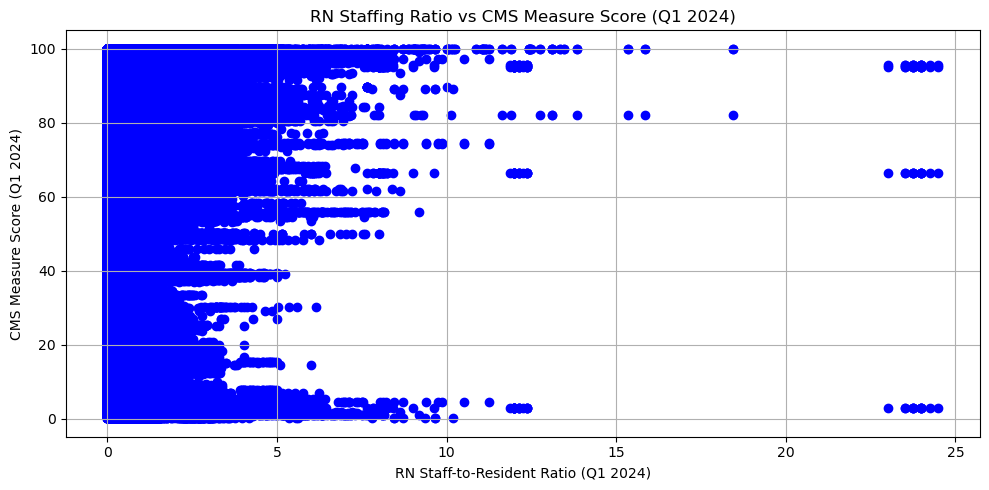

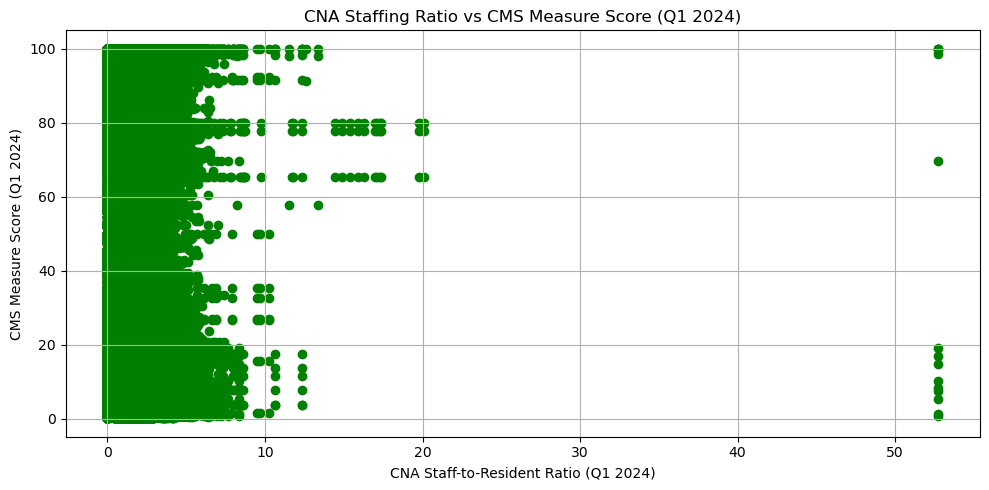

In [45]:
# Save the filtered facilities to a CSV file
low_staffing_and_poor_performance.to_csv('target_facilities_q1_2024.csv', index=False)

# Plotting RN Staffing vs Measure Score
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(low_staffing_and_poor_performance['RN_Staff_to_Resident_Ratio'], low_staffing_and_poor_performance['Measure_Score_Q1'], color='blue')
plt.title('RN Staffing Ratio vs CMS Measure Score (Q1 2024)')
plt.xlabel('RN Staff-to-Resident Ratio (Q1 2024)')
plt.ylabel('CMS Measure Score (Q1 2024)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting CNA Staffing vs Measure Score
plt.figure(figsize=(10, 5))
plt.scatter(low_staffing_and_poor_performance['CNA_Staff_to_Resident_Ratio'], low_staffing_and_poor_performance['Measure_Score_Q1'], color='green')
plt.title('CNA Staffing Ratio vs CMS Measure Score (Q1 2024)')
plt.xlabel('CNA Staff-to-Resident Ratio (Q1 2024)')
plt.ylabel('CMS Measure Score (Q1 2024)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
import pandas as pd

# Load the PBJ staffing data (replace with actual file path)
pbj_data = pd.read_csv('pbj.csv', low_memory=False)

# Select relevant columns from PBJ data and create a clean copy
pbj_data_clean = pbj_data[['PROVNUM', 'STATE', 'Hrs_RN', 'Hrs_CNA', 'MDScensus']].copy()

# Calculate RN and CNA Staff-to-Resident ratios
pbj_data_clean['RN_Staff_to_Resident_Ratio'] = pbj_data_clean['Hrs_RN'] / pbj_data_clean['MDScensus']
pbj_data_clean['CNA_Staff_to_Resident_Ratio'] = pbj_data_clean['Hrs_CNA'] / pbj_data_clean['MDScensus']


In [47]:
# Select relevant columns from the CMS Quality Measures data
cms_data_clean = cms_quarterly_data[['CMS Certification Number (CCN)', 'Measure Code', 'Q1 Measure Score', 'Measure Description', 'Measure Period']].copy()

# Rename the columns to match the PBJ data
cms_data_clean.rename(columns={'CMS Certification Number (CCN)': 'Provider_Number'}, inplace=True)



In [48]:

# Merge PBJ data and CMS data on Provider_Number
merged_data = pd.merge(pbj_data_clean, cms_data_clean, left_on='PROVNUM', right_on='Provider_Number')


In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Replace inf values with NaN
pbj_data_clean['RN_Staff_to_Resident_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
pbj_data_clean['CNA_Staff_to_Resident_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in RN_Staff_to_Resident_Ratio and CNA_Staff_to_Resident_Ratio
pbj_data_clean.dropna(subset=['RN_Staff_to_Resident_Ratio', 'CNA_Staff_to_Resident_Ratio'], inplace=True)


In [53]:
pbj_data_clean.head()

,PROVNUM,STATE,Hrs_RN,Hrs_CNA,MDScensus,RN_Staff_to_Resident_Ratio,CNA_Staff_to_Resident_Ratio
0,15009,AL,40.07,156.34,50,0.801400,3.126800
1,15009,AL,58.89,149.40,49,1.201837,3.048980
2,15009,AL,55.02,147.15,49,1.122857,3.003061
3,15009,AL,57.13,142.21,50,1.142600,2.844200
4,15009,AL,46.76,149.40,51,0.916863,2.929412


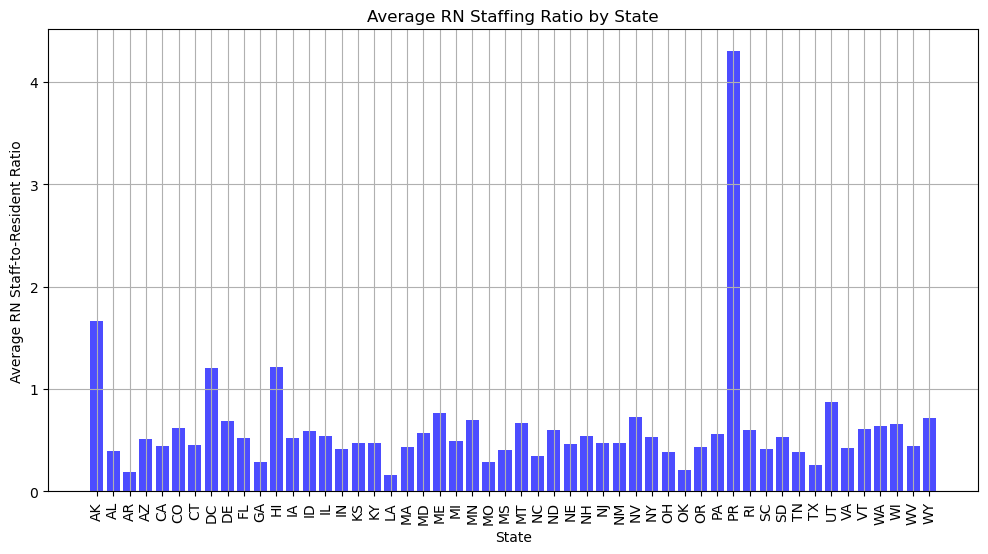

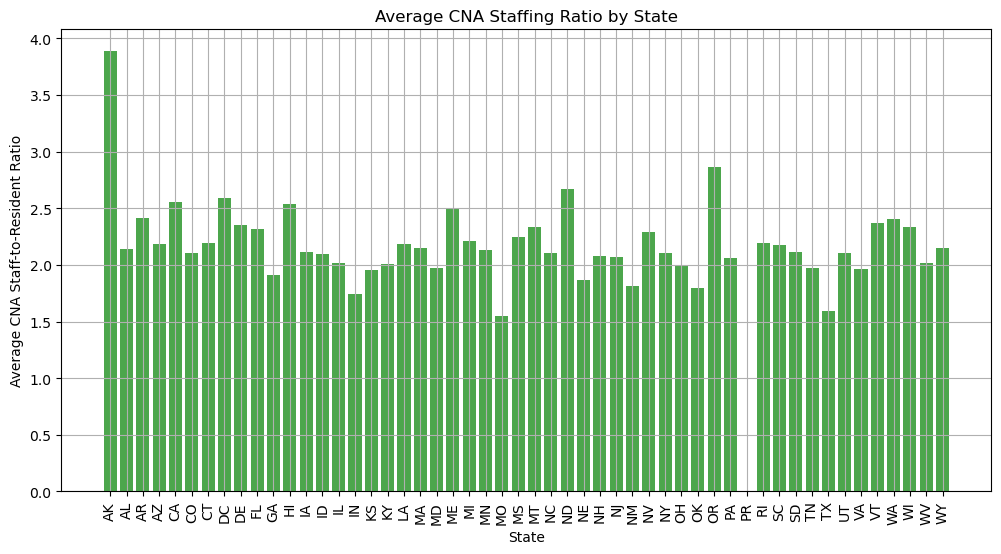

In [17]:
# Group by State and calculate mean staffing ratios
statewise_staffing = pbj_data_clean.groupby('STATE').agg({'RN_Staff_to_Resident_Ratio': 'mean', 'CNA_Staff_to_Resident_Ratio': 'mean'}).reset_index()

# Bar chart for RN Staffing by State
plt.figure(figsize=(12, 6))
plt.bar(statewise_staffing['STATE'], statewise_staffing['RN_Staff_to_Resident_Ratio'], color='blue', alpha=0.7)
plt.title('Average RN Staffing Ratio by State')
plt.xlabel('State')
plt.ylabel('Average RN Staff-to-Resident Ratio')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Bar chart for CNA Staffing by State
plt.figure(figsize=(12, 6))
plt.bar(statewise_staffing['STATE'], statewise_staffing['CNA_Staff_to_Resident_Ratio'], color='green', alpha=0.7)
plt.title('Average CNA Staffing Ratio by State')
plt.xlabel('State')
plt.ylabel('Average CNA Staff-to-Resident Ratio')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


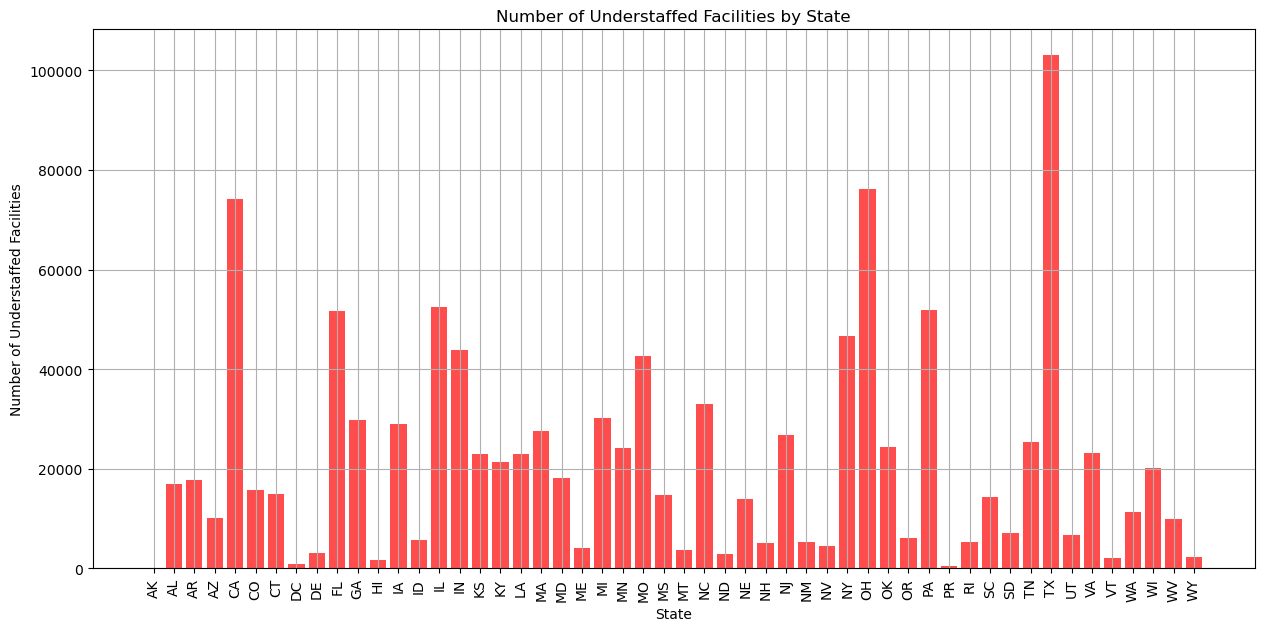

In [27]:
import matplotlib.pyplot as plt

# Define staffing benchmarks (these are just examples, adjust as needed)
rn_benchmark = 0.3  # RN hours per resident per day (example)
cna_benchmark = 2.5  # CNA hours per resident per day (example)

# Identify understaffed facilities based on benchmarks
understaffed_facilities = pbj_data_clean[
    (pbj_data_clean['RN_Staff_to_Resident_Ratio'] < rn_benchmark) |
    (pbj_data_clean['CNA_Staff_to_Resident_Ratio'] < cna_benchmark)
]

# Group by state to count the number of understaffed facilities
state_understaffed_count = understaffed_facilities.groupby('STATE').size().reset_index(name='Count')

# Plot number of understaffed facilities by state
plt.figure(figsize=(15, 7))
plt.bar(state_understaffed_count['STATE'], state_understaffed_count['Count'], color='red', alpha=0.7)
plt.title('Number of Understaffed Facilities by State')
plt.xlabel('State')
plt.ylabel('Number of Understaffed Facilities')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


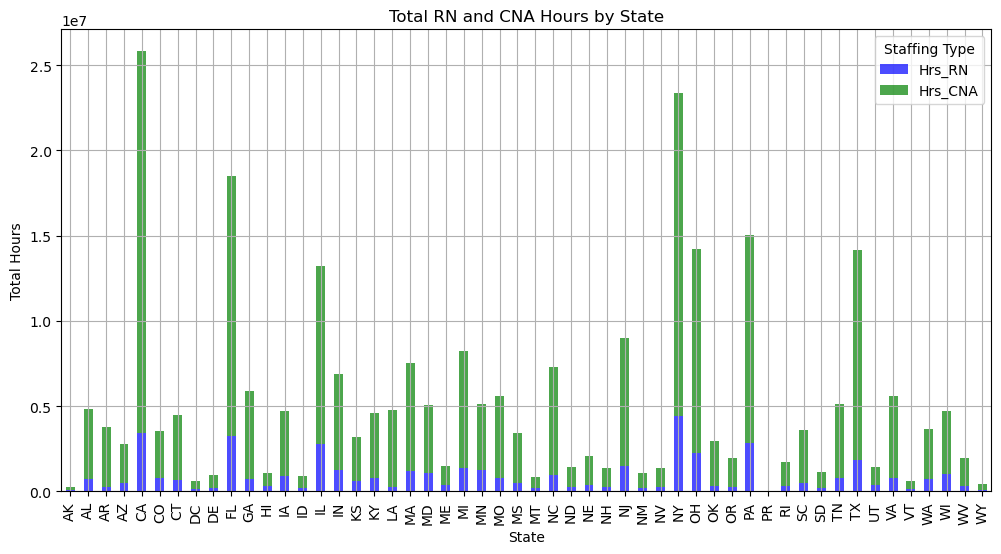

In [32]:
# Group by state and calculate total RN and CNA hours
state_total_hours = pbj_data_clean.groupby('STATE').agg({
    'Hrs_RN': 'sum',
    'Hrs_CNA': 'sum'
}).reset_index()

# Create a stacked bar chart to compare RN and CNA hours by state
state_total_hours.plot(
    kind='bar',
    x='STATE',
    y=['Hrs_RN', 'Hrs_CNA'],
    stacked=True,
    figsize=(12, 6),
    color=['blue', 'green'],
    alpha=0.7
)

plt.title('Total RN and CNA Hours by State')
plt.xlabel('State')
plt.ylabel('Total Hours')
plt.xticks(rotation=90)
plt.legend(title='Staffing Type')
plt.grid(True)
plt.show()
